In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=true"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


	Distribution of  Pregnancies


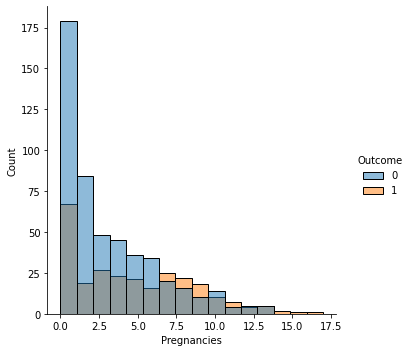


	Distribution of  Glucose


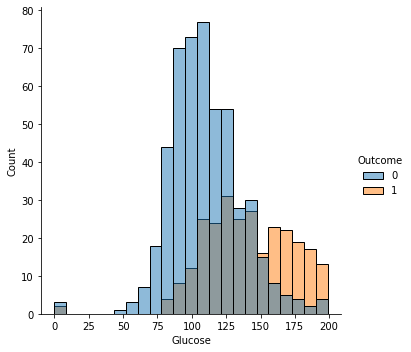


	Distribution of  BloodPressure


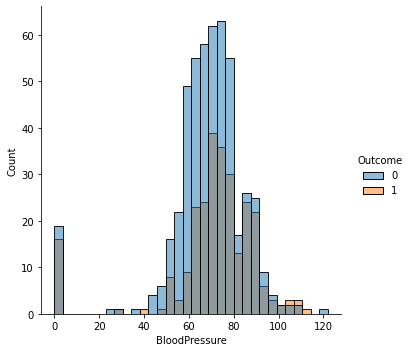


	Distribution of  SkinThickness


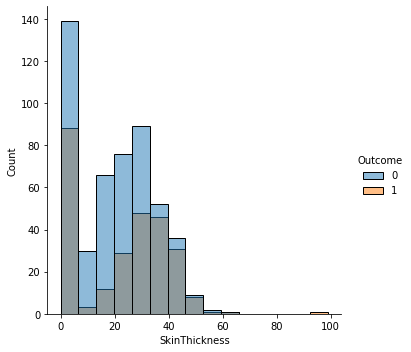


	Distribution of  Insulin


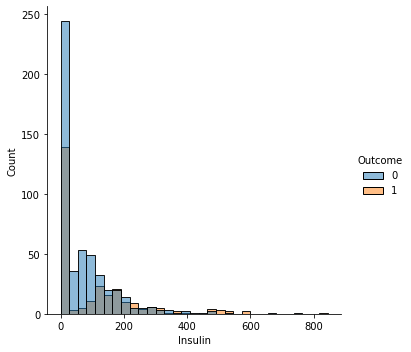


	Distribution of  BMI


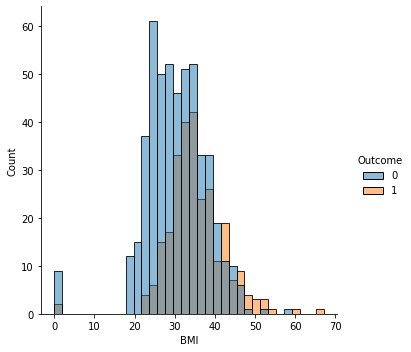


	Distribution of  DiabetesPedigreeFunction


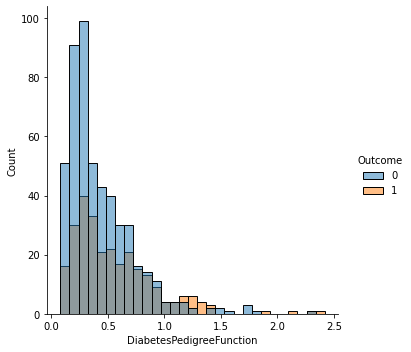


	Distribution of  Age


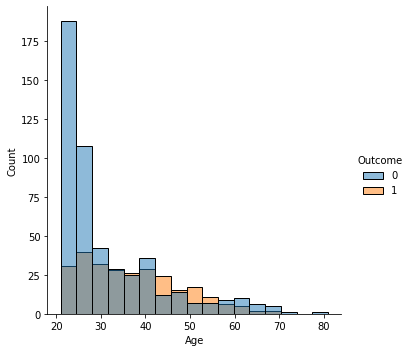


	Distribution of  Outcome


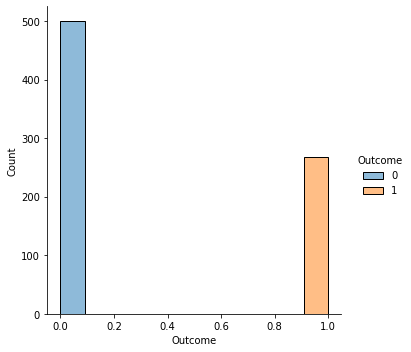

In [5]:
for column in df.columns:
    sns.displot(df, x=column,kind='hist',hue='Outcome')
    print("\tDistribution of ",column)
    plt.show()
    print()

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['BMI'].replace(0,np.nan,inplace=True)
df['Glucose'].replace(0,np.nan,inplace=True)
df['BloodPressure'].replace(0,np.nan,inplace=True)
df['SkinThickness'].replace(0,np.nan,inplace=True)
df['Insulin'].replace(0,np.nan,inplace=True)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
imputer = KNNImputer(n_neighbors=7)
imputed_df = pd.DataFrame(imputer.fit_transform(df))
imputed_df.columns = df.columns

In [13]:
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,180.857143,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.857143,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,27.0,171.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [14]:
imputed_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

	 Distribution of  Pregnancies


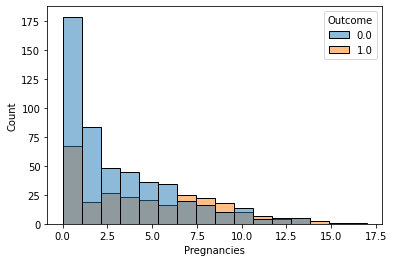

	 Distribution of  Glucose


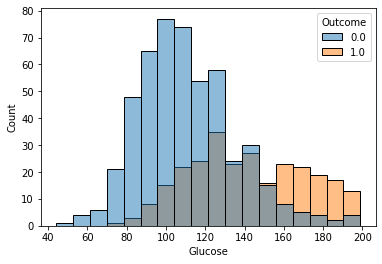

	 Distribution of  BloodPressure


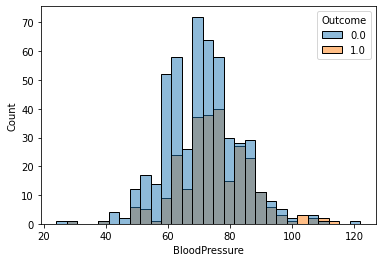

	 Distribution of  SkinThickness


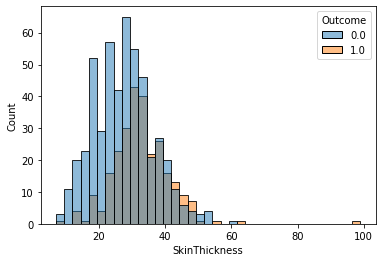

	 Distribution of  Insulin


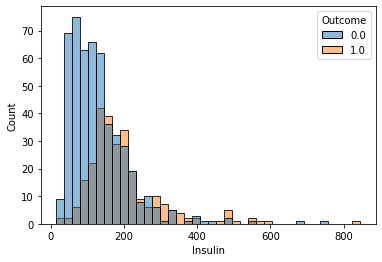

	 Distribution of  BMI


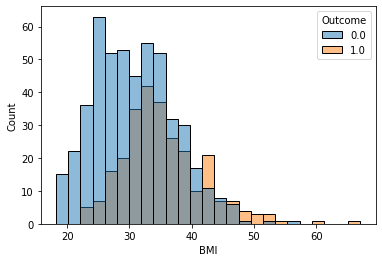

	 Distribution of  DiabetesPedigreeFunction


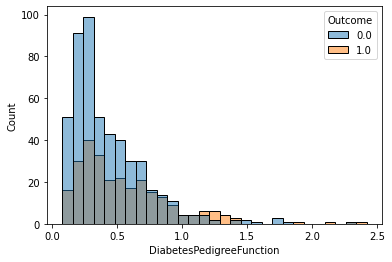

	 Distribution of  Age


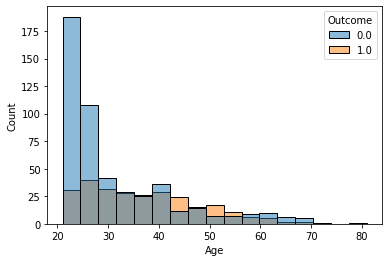

	 Distribution of  Outcome


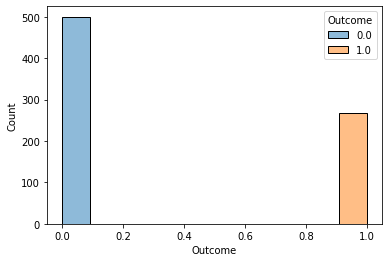

In [20]:
for column in imputed_df.columns:
  sns.histplot(data=imputed_df, x=column, hue="Outcome")
  print("\t Distribution of ", column)
  plt.show()

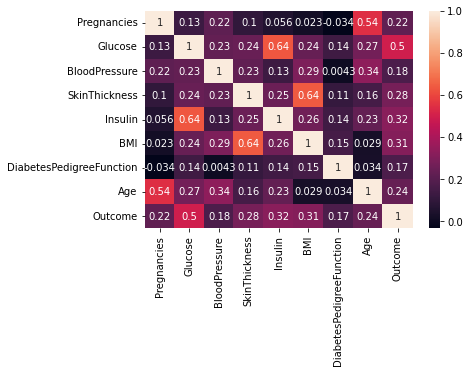

In [21]:
sns.heatmap(imputed_df.corr(), annot=True)
plt.show()

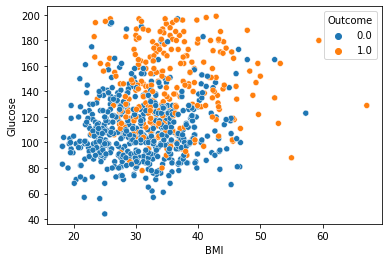

In [22]:
sns.scatterplot(data=imputed_df, x="BMI", y="Glucose", hue="Outcome")
plt.show()

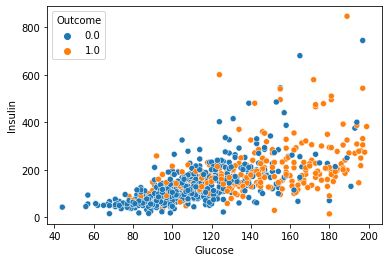

In [24]:
sns.scatterplot(data=imputed_df, y="Insulin", x="Glucose", hue="Outcome")
plt.show()

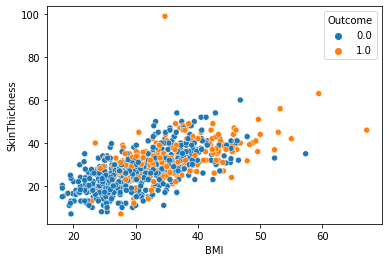

In [25]:
sns.scatterplot(data=imputed_df, x="BMI", y="SkinThickness", hue="Outcome")
plt.show()

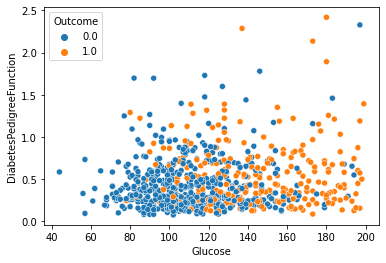

In [27]:
sns.scatterplot(data=imputed_df, x="Glucose", y="DiabetesPedigreeFunction", hue="Outcome")
plt.show()

In [120]:
# Conclusion
# 1.Glucose, Insulin, Age, BMI, SkinThickness are important features to consider to segregate the patient to be diabetic or not.
# 2.Glucose and Insulin, BMI and SkinThickness are highly correlated to each other. We can omit either one of the feature for prediction.
# 3.Diabetic Pedigree Function is not as important as other features to predict the outome.
# 4.The dataset is imbalanced and is biased towards the not diabetic class.

In [37]:
def predict_knn(X_train, y_train, X_test, y_test):
  k_values = [k for k in range(1, 100, 2)]

  model = KNeighborsClassifier()

  params_grid = dict(n_neighbors=k_values)

  grid = GridSearchCV(model, params_grid, cv=10, scoring="accuracy", return_train_score=False, verbose=1, n_jobs=-1)

  grid_search = grid.fit(X_train, y_train)

  print(grid_search.best_params_)
  pred = grid.predict(X_test)
  print("Accuracy of KNN ", accuracy_score(pred, y_test))
  return accuracy_score(pred, y_test)

In [38]:
def predict_random_forest(X_train, y_train, X_test, y_test):
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print("Accuracy score of RandomForest", accuracy_score(pred, y_test))
  return accuracy_score(pred, y_test)


In [34]:
X = imputed_df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y = imputed_df["Outcome"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [39]:
predict_knn(X_train, y_train, X_test, y_test)
predict_random_forest(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 19}
Accuracy of KNN  0.7532467532467533
Accuracy score of RandomForest 0.7575757575757576


0.7575757575757576

In [40]:
X_new = X.drop(["DiabetesPedigreeFunction","SkinThickness","Insulin","Pregnancies"],1)
X_new.columns

<ipython-input-40-c22fe12057b7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_new = X.drop(["DiabetesPedigreeFunction","SkinThickness","Insulin","Pregnancies"],1)


Index(['Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')

In [41]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_new, Y, train_size=0.7, test_size=0.3,random_state=0)

In [45]:
predict_knn(X_train1,Y_train1,X_test1,Y_test1)

predict_random_forest(X_train1,Y_train1,X_test1,Y_test1)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 23}
Accuracy of KNN  0.7575757575757576
Accuracy score of RandomForest 0.7792207792207793


0.7792207792207793

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_Over,Y_Over = over_sampler.fit_resample(X_new,Y)
Sampled_Dataset = X_Over.merge(Y_Over,left_index=True,right_index=True)
Sampled_Dataset 

,Glucose,BloodPressure,BMI,Age,Outcome
0,148.0,72.0,33.6,50.0,1.0
1,85.0,66.0,26.6,31.0,0.0
2,183.0,64.0,23.3,32.0,1.0
3,89.0,66.0,28.1,21.0,0.0
4,137.0,40.0,43.1,33.0,1.0
...,...,...,...,...,...
995,158.0,76.0,31.6,28.0,1.0
996,189.0,104.0,34.3,41.0,1.0
997,131.0,88.0,31.6,32.0,1.0
998,187.0,70.0,36.4,36.0,1.0


In [47]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_Over, Y_Over, train_size=0.7, test_size=0.3,random_state=0)

In [48]:
predict_random_forest(X_train3, Y_train3, X_test3, Y_test3)

Accuracy score of RandomForest 0.8233333333333334


0.8233333333333334

In [49]:
predict_random_forest(X_train3, Y_train3, X_test1, Y_test1)


Accuracy score of RandomForest 0.9134199134199135


0.9134199134199135